In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# reading the data

import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [7]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
# Drop columns with too many missing values or not useful
train_df = train_df.drop(columns=["Cabin", "Ticket", "Name"])

# Fill missing Age with median
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)

# Fill missing Embarked with mode
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)

# Confirm no more missing values and show how many missing values exist in each column
print(train_df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


C:\Users\Bhargav Pokharel\AppData\Local\Temp\ipykernel_2120\3375003939.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
C:\Users\Bhargav Pokharel\AppData\Local\Temp\ipykernel_2120\3375003939.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [9]:
train_df["Sex"] = train_df["Sex"].map({"male": 0, "female": 1})
train_df["Embarked"] = train_df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

Prepare Features and Target

We separate the dataset into:

- **Features (X)**: The columns that the model will use to learn and predict (`Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, `Embarked`)
- **Target (y)**: The column to predict, which is `Survived` (0 = did not survive, 1 = survived)


In [10]:

# Separate features (X) and target variable (y)
X = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_df['Survived']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeatures used:")
print(X.columns.tolist())

Features shape: (891, 7)
Target shape: (891,)

Features used:
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [11]:
#Data Splitting and Scaling
# Split the training data into training and validation sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#train_test_split returns a tuple of 4 arrays

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print("\nData scaled successfully!")

Training set size: (712, 7)
Validation set size: (179, 7)

Data scaled successfully!


In [12]:

# Train Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_val_scaled)

# Evaluate model
accuracy = accuracy_score(y_val, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Random Forest Accuracy: 0.8156

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



In [13]:

# Tune hyperparameters to improve accuracy
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                          param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get best model
best_model = grid_search.best_estimator_
best_accuracy = accuracy_score(y_val, best_model.predict(X_val_scaled))

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
print(f"Best validation accuracy: {best_accuracy:.4f}")

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 0.8301
Best validation accuracy: 0.8045


In [14]:

# Apply the selected model on the test dataset
# First, clean and preprocess test data similar to training data

# Clean test data
test_df_clean = test_df.drop(columns=['Cabin', 'Ticket', 'Name'])

# Fill missing values in test data
test_df_clean['Age'].fillna(test_df_clean['Age'].median(), inplace=True)
test_df_clean['Fare'].fillna(test_df_clean['Fare'].median(), inplace=True)
test_df_clean['Embarked'].fillna(test_df_clean['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
test_df_clean['Sex'] = test_df_clean['Sex'].map({'male': 0, 'female': 1})
test_df_clean['Embarked'] = test_df_clean['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Prepare test features
X_test = test_df_clean[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Scale test features
X_test_scaled = scaler.transform(X_test)

# Make predictions
test_predictions = best_model.predict(X_test_scaled)

# Create submission dataframe
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})

print("Test predictions completed!")
print(f"Predicted survivors: {sum(test_predictions)}")
print(f"Predicted non-survivors: {len(test_predictions) - sum(test_predictions)}")

Test predictions completed!
Predicted survivors: 136
Predicted non-survivors: 282


C:\Users\Bhargav Pokharel\AppData\Local\Temp\ipykernel_2120\4165078898.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df_clean['Age'].fillna(test_df_clean['Age'].median(), inplace=True)
C:\Users\Bhargav Pokharel\AppData\Local\Temp\ipykernel_2120\4165078898.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [15]:

submission.to_csv('titanic_predictions.csv', index=False)
print("Predictions saved to 'titanic_predictions.csv'")
print("\nFirst 10 predictions:")
print(submission.head(10))

Predictions saved to 'titanic_predictions.csv'

First 10 predictions:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0
5          897         0
6          898         1
7          899         0
8          900         1
9          901         0


Feature Importance:
    feature  importance
1       Sex    0.353252
5      Fare    0.214589
2       Age    0.183784
0    Pclass    0.130214
3     SibSp    0.046108
6  Embarked    0.036872
4     Parch    0.035181


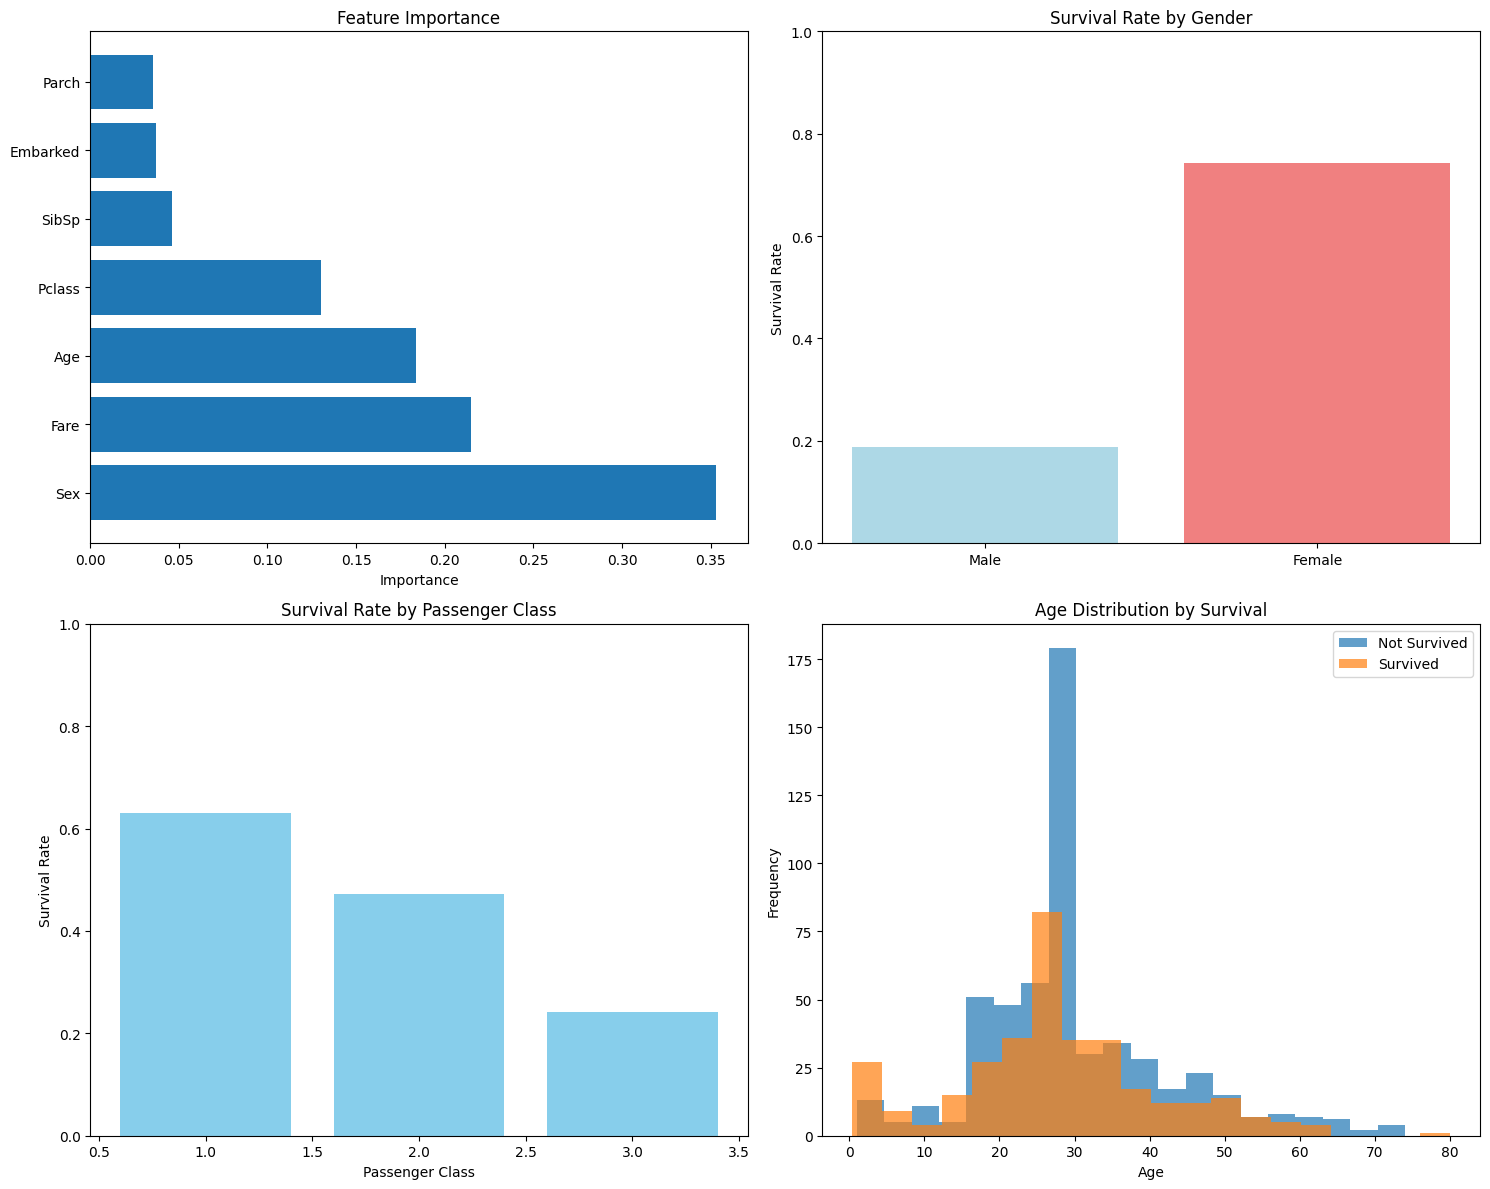

In [16]:

# Visualize feature importance and survival patterns

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Feature Importance
axes[0, 0].barh(feature_importance['feature'], feature_importance['importance'])
axes[0, 0].set_title('Feature Importance')
axes[0, 0].set_xlabel('Importance')

# 2. Survival Rate by Gender
survival_by_sex = train_df.groupby('Sex')['Survived'].mean()
axes[0, 1].bar(['Male', 'Female'], survival_by_sex.values, color=['lightblue', 'lightcoral'])
axes[0, 1].set_title('Survival Rate by Gender')
axes[0, 1].set_ylabel('Survival Rate')
axes[0, 1].set_ylim(0, 1)

# 3. Survival Rate by Passenger Class
survival_by_class = train_df.groupby('Pclass')['Survived'].mean()
axes[1, 0].bar(survival_by_class.index, survival_by_class.values, color='skyblue')
axes[1, 0].set_title('Survival Rate by Passenger Class')
axes[1, 0].set_xlabel('Passenger Class')
axes[1, 0].set_ylabel('Survival Rate')
axes[1, 0].set_ylim(0, 1)

# 4. Age Distribution by Survival
axes[1, 1].hist(train_df[train_df['Survived']==0]['Age'], alpha=0.7, label='Not Survived', bins=20)
axes[1, 1].hist(train_df[train_df['Survived']==1]['Age'], alpha=0.7, label='Survived', bins=20)
axes[1, 1].set_title('Age Distribution by Survival')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [17]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print("Training data shape:", train_df.shape)
print("Test data shape:    ", test_df.shape)

Training data shape: (891, 12)
Test data shape:     (418, 11)


In [ ]:

# Summarize key insights from the data and model results

print("=" * 60)
print("TITANIC SURVIVAL PREDICTION - SUMMARY")
print("=" * 60)

print(f"\n Dataset Information:")
print(f"Training samples: {len(train_df)}")
print(f"Test samples: {len(test_df)}")
print(f"Features used: {len(X.columns)}")

print(f"\n Model Performance:")
print(f"Best validation accuracy: {best_accuracy:.4f}")
print(f"Cross-validation score: {grid_search.best_score_:.4f}")

print(f"\n Key Insights:")
print(f"Overall survival rate: {train_df['Survived'].mean():.2%}")

# Gender insights
female_survival = train_df[train_df['Sex']==1]['Survived'].mean()
male_survival = train_df[train_df['Sex']==0]['Survived'].mean()
print(f"Female survival rate: {female_survival:.2%}")
print(f"Male survival rate: {male_survival:.2%}")

# Class insights
for pclass in sorted(train_df['Pclass'].unique()):
    class_survival = train_df[train_df['Pclass']==pclass]['Survived'].mean()
    print(f"Class {pclass} survival rate: {class_survival:.2%}")

print(f"\n Most Important Features:")
for i, (feature, importance) in enumerate(zip(feature_importance['feature'], feature_importance['importance']), 1):
    print(f"{i}. {feature}: {importance:.4f}")


TITANIC SURVIVAL PREDICTION - SUMMARY

 Dataset Information:
Training samples: 891
Test samples: 418
Features used: 7

 Model Performance:
Best validation accuracy: 0.8045
Cross-validation score: 0.8301

 Key Insights:
Overall survival rate: 38.38%
Female survival rate: nan%
Male survival rate: nan%
Class 1 survival rate: 62.96%
Class 2 survival rate: 47.28%
Class 3 survival rate: 24.24%

 Most Important Features:
1. Sex: 0.3533
2. Fare: 0.2146
3. Age: 0.1838
4. Pclass: 0.1302
5. SibSp: 0.0461
6. Embarked: 0.0369
7. Parch: 0.0352
